In [1]:
# Core
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 100)


In [2]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,missing_count
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


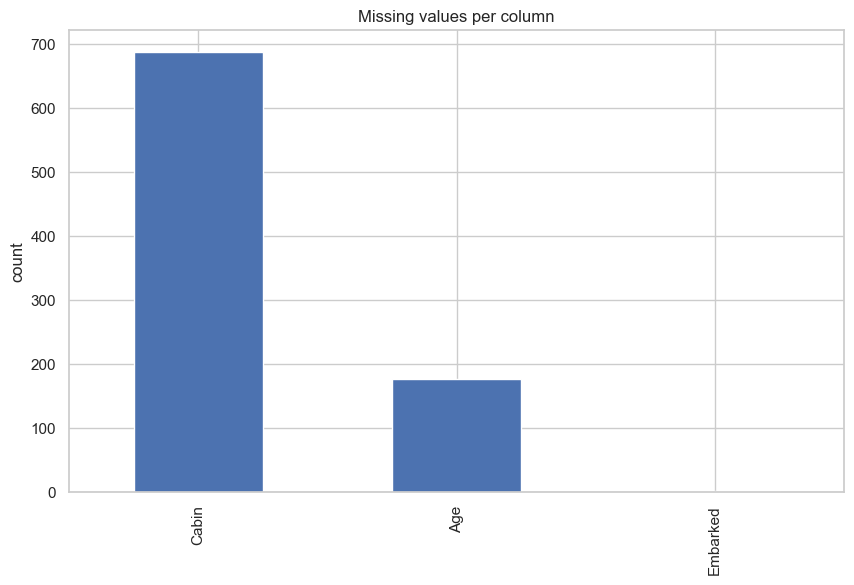

In [3]:
print(df.shape)
display(df.info())
display(df.describe(include="all").T)

# Missing values overview
mv = df.isnull().sum().sort_values(ascending=False)
display(mv.to_frame("missing_count"))

# Simple bar of missing values
mv[mv>0].plot(kind="bar")
plt.title("Missing values per column")
plt.ylabel("count")
plt.show()


In [4]:
df_clean = df.copy()

# 4.1 Fill 'Embarked' (mode)
df_clean["Embarked"] = df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0])

# 4.2 Fill 'Age' (median by Sex & Pclass for a bit more realistic imputation)
age_medians = df_clean.groupby(["Sex","Pclass"])["Age"].median()

def fill_age(row):
    if pd.isna(row["Age"]):
        return age_medians.loc[row["Sex"], row["Pclass"]]
    else:
        return row["Age"]

df_clean["Age"] = df_clean.apply(fill_age, axis=1)

# 4.3 Fill 'Fare' (just in case, though usually not missing in train.csv)
if df_clean["Fare"].isna().any():
    df_clean["Fare"] = df_clean["Fare"].fillna(df_clean["Fare"].median())

# 4.4 Create 'HasCabin' then drop 'Cabin'
df_clean["HasCabin"] = df_clean["Cabin"].notna().astype(int)
df_clean = df_clean.drop(columns=["Cabin"])

# 4.5 Drop 'Ticket' (not very useful for EDA)
df_clean = df_clean.drop(columns=["Ticket"])

# 4.6 Remove potential duplicates by PassengerId
df_clean = df_clean.drop_duplicates(subset="PassengerId", keep="first")

# 4.7 Cast some columns to category
cat_cols = ["Sex","Embarked","Pclass"]
for c in cat_cols:
    df_clean[c] = df_clean[c].astype("category")

df_clean.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [5]:
# Family size = self + siblings/spouse + parents/children
df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"] + 1
df_clean["IsAlone"] = (df_clean["FamilySize"] == 1).astype(int)

# Extract Title from Name
df_clean["Title"] = df_clean["Name"].str.extract(r",\s*([^.]*)\.", expand=False).str.strip()
# Group rare titles
title_map = {
    "Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs",
    "Lady":"Royalty", "Countess":"Royalty", "Sir":"Royalty", "Don":"Royalty",
    "Jonkheer":"Royalty", "Dona":"Royalty", "Capt":"Officer", "Col":"Officer",
    "Major":"Officer", "Dr":"Officer", "Rev":"Officer"
}
df_clean["Title"] = df_clean["Title"].replace(title_map)
rare_titles = df_clean["Title"].value_counts()[df_clean["Title"].value_counts()<10].index
df_clean["Title"] = df_clean["Title"].replace(dict.fromkeys(rare_titles, "Rare"))
df_clean["Title"] = df_clean["Title"].astype("category")

# Age groups
bins_age = [0, 12, 18, 35, 60, 80]
labels_age = ["Child","Teen","YoungAdult","Adult","Senior"]
df_clean["AgeGroup"] = pd.cut(df_clean["Age"], bins=bins_age, labels=labels_age, right=False)

# Fare groups (quartiles)
df_clean["FareGroup"] = pd.qcut(df_clean["Fare"], q=4, labels=["Q1","Q2","Q3","Q4"])
df_clean.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,Title,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,2,0,Mr,YoungAdult,Q1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,2,0,Mrs,Adult,Q4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,1,Miss,YoungAdult,Q2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,2,0,Mrs,Adult,Q4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,1,Mr,Adult,Q2


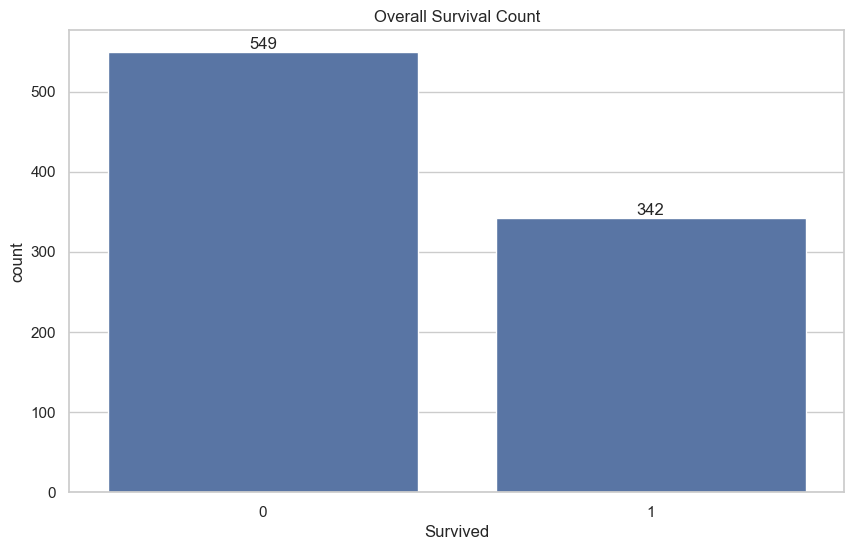

Overall survival rate: 38.38%


In [6]:
ax = sns.countplot(x="Survived", data=df_clean)
ax.bar_label(ax.containers[0])
plt.title("Overall Survival Count")
plt.show()

survival_rate = df_clean["Survived"].mean()
print(f"Overall survival rate: {survival_rate:.2%}")


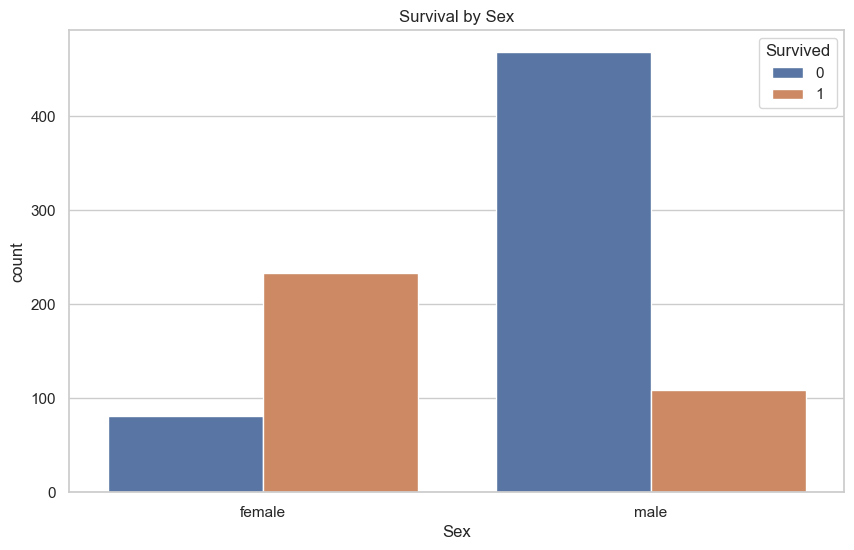

C:\Users\91902\AppData\Local\Temp\ipykernel_17376\919319237.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tbl_sex = df_clean.pivot_table(values="Survived", index="Sex", aggfunc="mean").sort_values("Survived", ascending=False)


,SurvivalRate%
Sex,
female,74.20
male,18.89


In [7]:
# Plot
sns.countplot(x="Sex", hue="Survived", data=df_clean)
plt.title("Survival by Sex")
plt.show()

# Table
tbl_sex = df_clean.pivot_table(values="Survived", index="Sex", aggfunc="mean").sort_values("Survived", ascending=False)
display((tbl_sex*100).round(2).rename(columns={"Survived":"SurvivalRate%"}))


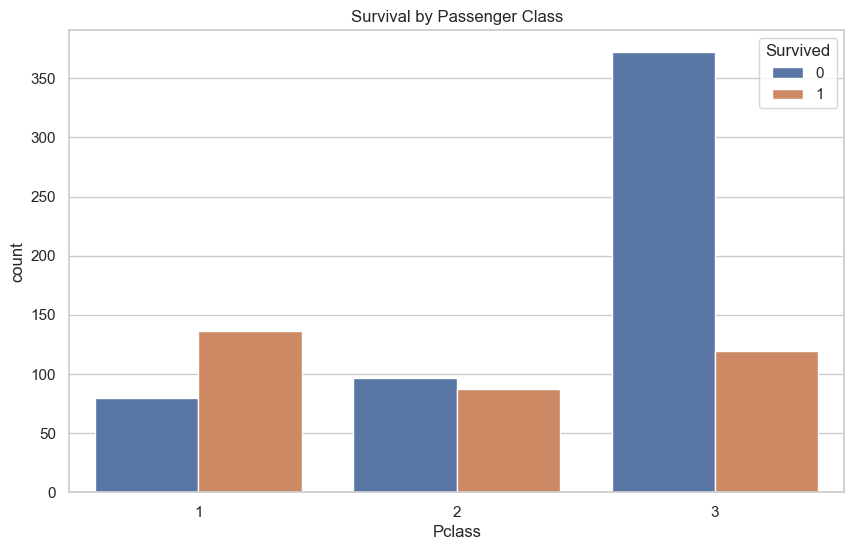

C:\Users\91902\AppData\Local\Temp\ipykernel_17376\1486990287.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tbl_pclass = df_clean.pivot_table(values="Survived", index="Pclass", aggfunc="mean").sort_index()


,SurvivalRate%
Pclass,
1,62.96
2,47.28
3,24.24


In [8]:
sns.countplot(x="Pclass", hue="Survived", data=df_clean)
plt.title("Survival by Passenger Class")
plt.show()

tbl_pclass = df_clean.pivot_table(values="Survived", index="Pclass", aggfunc="mean").sort_index()
display((tbl_pclass*100).round(2).rename(columns={"Survived":"SurvivalRate%"}))


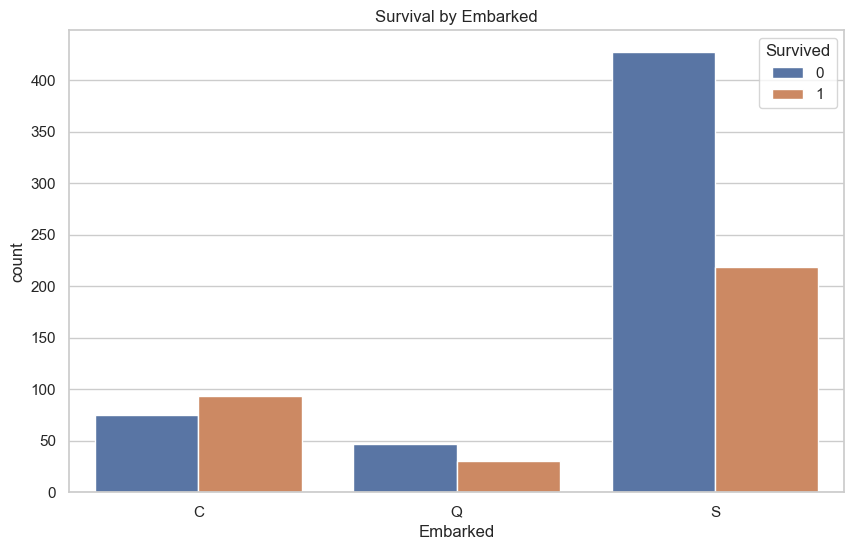

C:\Users\91902\AppData\Local\Temp\ipykernel_17376\2916090507.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tbl_emb = df_clean.pivot_table(values="Survived", index="Embarked", aggfunc="mean").sort_values("Survived", ascending=False)


,SurvivalRate%
Embarked,
C,55.36
Q,38.96
S,33.90


In [9]:
sns.countplot(x="Embarked", hue="Survived", data=df_clean)
plt.title("Survival by Embarked")
plt.show()

tbl_emb = df_clean.pivot_table(values="Survived", index="Embarked", aggfunc="mean").sort_values("Survived", ascending=False)
display((tbl_emb*100).round(2).rename(columns={"Survived":"SurvivalRate%"}))


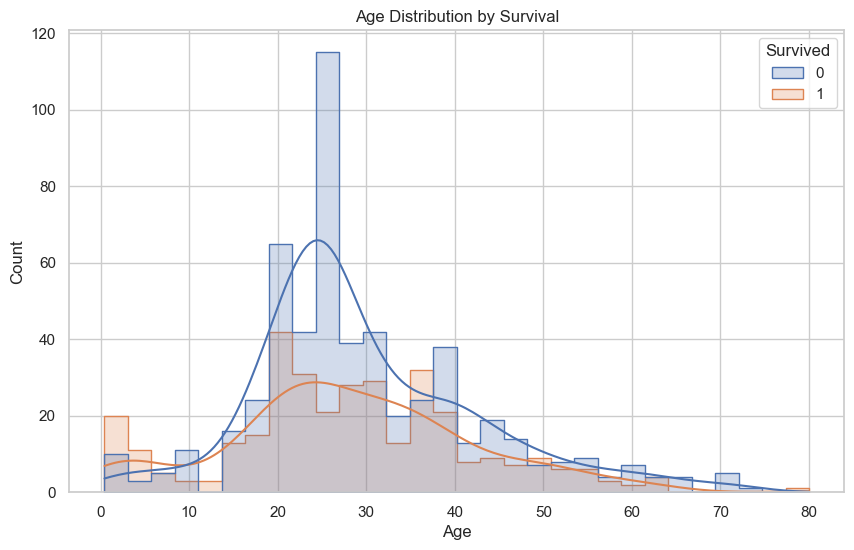

C:\Users\91902\AppData\Local\Temp\ipykernel_17376\31970651.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tbl_agegrp = df_clean.pivot_table(values="Survived", index="AgeGroup", aggfunc="mean")


,SurvivalRate%
AgeGroup,
Child,57.35
Teen,48.89
YoungAdult,33.72
Adult,42.26
Senior,24.00


In [10]:
sns.histplot(data=df_clean, x="Age", hue="Survived", bins=30, kde=True, element="step")
plt.title("Age Distribution by Survival")
plt.show()

tbl_agegrp = df_clean.pivot_table(values="Survived", index="AgeGroup", aggfunc="mean")
display((tbl_agegrp*100).round(2).rename(columns={"Survived":"SurvivalRate%"}))


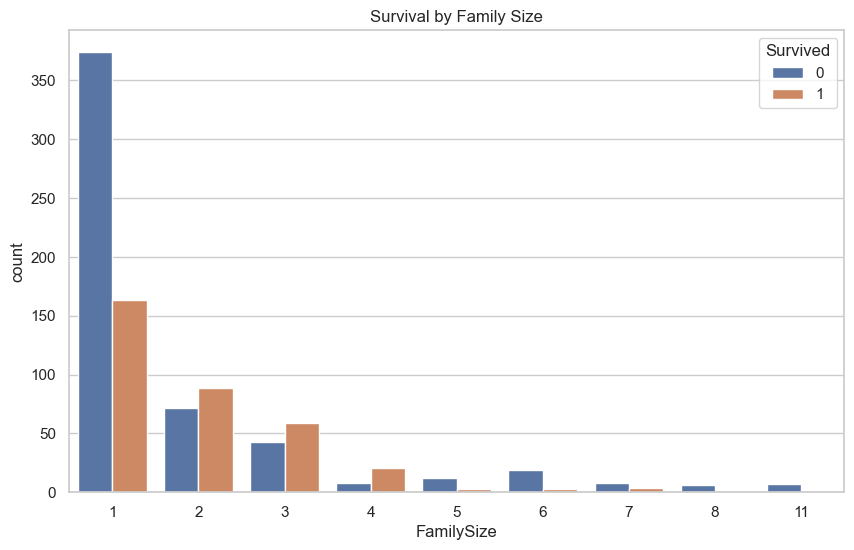

,SurvivalRate%
FamilySize,
1,30.35
2,55.28
3,57.84
4,72.41
5,20.00
6,13.64
7,33.33
8,0.00
11,0.00


In [11]:
sns.countplot(x="FamilySize", hue="Survived", data=df_clean)
plt.title("Survival by Family Size")
plt.show()

tbl_fam = df_clean.pivot_table(values="Survived", index="FamilySize", aggfunc="mean")
display((tbl_fam*100).round(2).rename(columns={"Survived":"SurvivalRate%"}).sort_index())


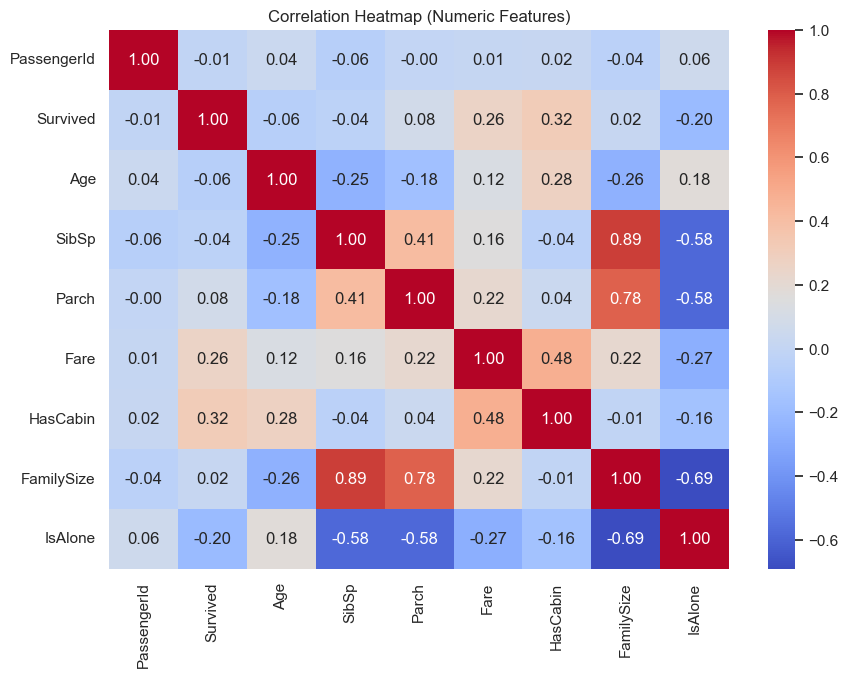

In [12]:
num_cols = df_clean.select_dtypes(include=["int64","float64"]).columns
corr = df_clean[num_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [14]:
print("Key takeaways (quick):")
print(f"- Overall survival rate: {df_clean['Survived'].mean():.2%}")
print("- Survival by Sex:")
print((df_clean.groupby('Sex')['Survived'].mean()*100).round(1).astype(str) + "%")
print("- Survival by Pclass:")
print((df_clean.groupby('Pclass')['Survived'].mean()*100).round(1).astype(str) + "%")
print("- Highest/Lowest survival by AgeGroup:")
print((df_clean.groupby('AgeGroup')['Survived'].mean()*100).round(1).astype(str) + "%")




Key takeaways (quick):
- Overall survival rate: 38.38%
- Survival by Sex:
Sex
female    74.2%
male      18.9%
Name: Survived, dtype: object
- Survival by Pclass:
Pclass
1    63.0%
2    47.3%
3    24.2%
Name: Survived, dtype: object
- Highest/Lowest survival by AgeGroup:
AgeGroup
Child         57.4%
Teen          48.9%
YoungAdult    33.7%
Adult         42.3%
Senior        24.0%
Name: Survived, dtype: object


C:\Users\91902\AppData\Local\Temp\ipykernel_17376\1783980690.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df_clean.groupby('Sex')['Survived'].mean()*100).round(1).astype(str) + "%")
C:\Users\91902\AppData\Local\Temp\ipykernel_17376\1783980690.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df_clean.groupby('Pclass')['Survived'].mean()*100).round(1).astype(str) + "%")
C:\Users\91902\AppData\Local\Temp\ipykernel_17376\1783980690.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

In [14]:
df_clean.to_csv("titanic_cleaned.csv", index=False)
print("Saved: titanic_cleaned.csv")


Saved: titanic_cleaned.csv
